In [2]:
from math import log2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def parse_rust_function_to_symbol_frequency_pairs(
    rust_function_str: str,
) -> list[tuple[int, int]]:
    """
    Parses a Rust function string and extracts pairs of integers from it.

    Args:
        rust_function_str (str): The Rust function string to parse.

    Returns:
        list: A list of pairs, where each pair is a tuple of two integers.
    """
    pairs = []
    for line in rust_function_str.split("\n"):
        if "weights.insert" in line:
            pair = line.split("weights.insert")[1][1:-2].split(", ")
            pairs.append((int(pair[0]), int(pair[1])))
    return pairs


def calculate_symbol_probabilities(
    pairs: list[tuple[int, int]]
) -> list[tuple[int, float]]:
    """
    Calculate the probabilities of each pair based on their frequencies.

    Args:
        pairs (list[tuple[int, int]]): A list of tuples representing pairs of values and their frequencies.

    Returns:
        list[tuple[int, float]]: A list of tuples representing pairs of values and their probabilities.
    """
    total_freq = sum(freq for _, freq in pairs)
    probabilities = [(index, freq / total_freq) for index, freq in pairs]
    return probabilities


def calculate_entropy(probabilities: list[tuple[int, float]]) -> float:
    """
    Calculates the entropy of a given list of probabilities.

    Args:
        probabilities (list[tuple[int, float]]): A list of tuples representing the index and probability of an event.

    Returns:
        float: The calculated entropy value.

    """
    probabilities = [(index, p) for index, p in probabilities if p > 0]
    entropy = -sum(p * log2(p) for _, p in probabilities)
    return entropy

In [4]:
# open the huffman_codes.rs file and read the contents
print(
    calculate_entropy(
        calculate_symbol_probabilities(
            parse_rust_function_to_symbol_frequency_pairs(
                open("../cgn/src/compression/utils/huffman_codes.rs").read()
            )
        )
    )
)

4.381559249939818


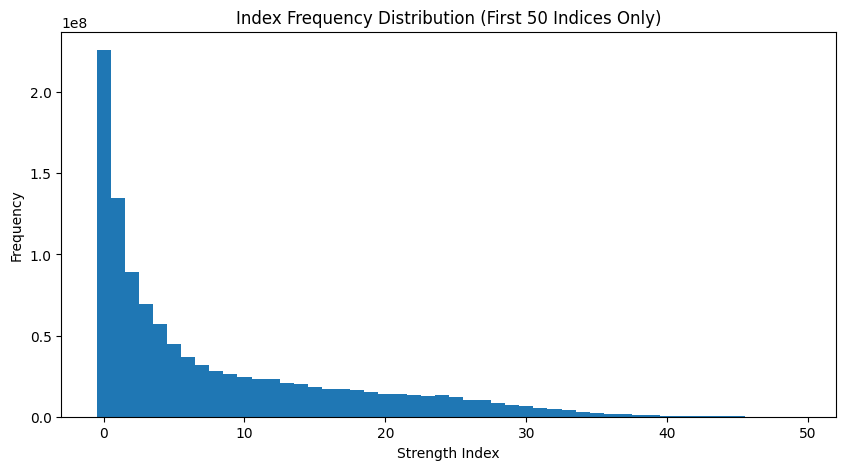

In [21]:
frequency_pairs = parse_rust_function_to_symbol_frequency_pairs(
    open("../cgn/src/compression/utils/huffman_codes.rs").read()
)
frequency_pairs = [(index, p) for index, p in frequency_pairs if index < 50]

plt.figure(figsize=(10, 5))
plt.bar(
    [index for index, _ in frequency_pairs], [p for _, p in frequency_pairs], width=1
)
plt.xlabel("Strength Index")
plt.ylabel("Frequency")
plt.title("Index Frequency Distribution (First 50 Indices Only)")
plt.show()

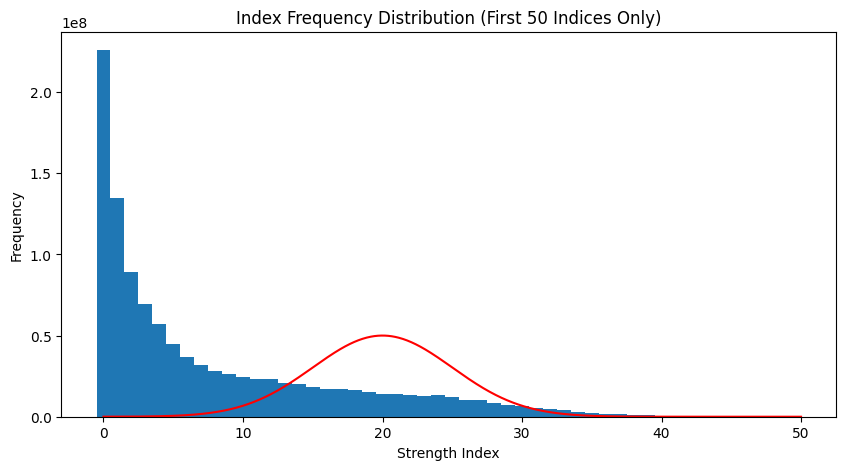

In [22]:
def gaussian(height, dev, mean, x):
    b = -((x - mean) ** 2 / (2 * dev**2))
    return height * np.exp(b)


GAUSSIAN_HEIGHT = 50000000
GAUSSIAN_DEV = 5

# draw the old frequency distribution and the gaussian distribution
plt.figure(figsize=(10, 5))
plt.bar(
    [index for index, _ in frequency_pairs],
    [p for _, p in frequency_pairs],
    width=1,
)
x = np.linspace(0, len(frequency_pairs), 1000)
y = gaussian(GAUSSIAN_HEIGHT, GAUSSIAN_DEV, 20, x)
plt.plot(x, y, color="red")
plt.xlabel("Strength Index")
plt.ylabel("Frequency")
plt.title("Index Frequency Distribution (First 50 Indices Only)")
plt.show()

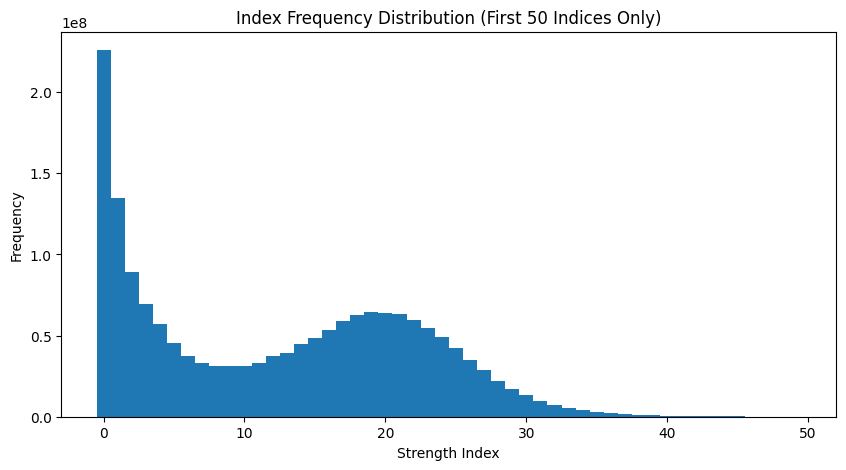

In [23]:
# update the frequency distribution with the gaussian distribution
new_pairs = []
for index, p in frequency_pairs:
    new_pairs.append((index, p + gaussian(GAUSSIAN_HEIGHT, GAUSSIAN_DEV, 20, index)))
new_pairs = [(index, p) for index, p in new_pairs if p > 0]

plt.figure(figsize=(10, 5))
plt.bar([index for index, _ in new_pairs], [p for _, p in new_pairs], width=1)
plt.xlabel("Strength Index")
plt.ylabel("Frequency")
plt.title("Index Frequency Distribution (First 50 Indices Only)")
plt.show()